In [13]:

import lightgbm as lgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [14]:
# Load data
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

X = df.drop('Target', axis=1)
y = df['Target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [16]:
# Parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1
}

In [17]:
# Train model
model = lgb.train(params, train_data, valid_sets=[test_data])

In [18]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.8360449251645318
MSE: 0.21484820209255617


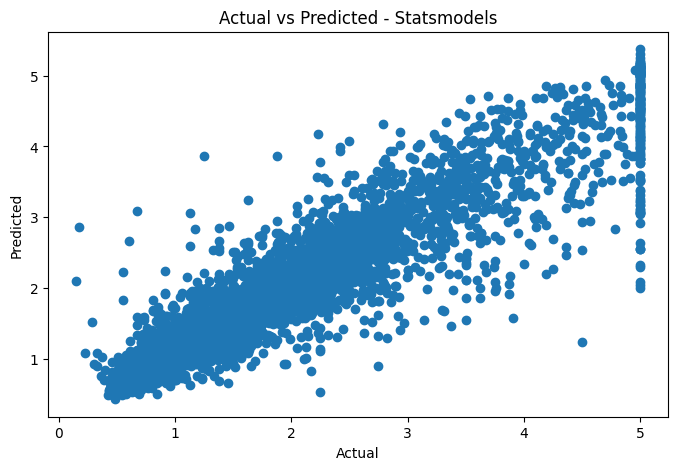

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Statsmodels")
plt.show()